# Standard Libraries:

In [7]:
import pandas as pd
import os
from ggplot import *
% matplotlib inline

# Read Data and Process:

In [ ]:
data_path = 'C:/Users/VN/Documents/GitHub/Sous-vide-crockpot/data'
data_file = 'test1_clean.csv'

In [8]:
data = pd.read_csv(os.path.join(data_path,data_file))
data['Time_minutes'] = data['Time (s)'] / 60.0
data['Temp_C'] = (data['Temp (F)'] - 32) * 5.0 / 9
data.head()

,Time (s),Temp (F),On,Time_minutes,Temp_C
0,15,67.55,1,0.250000,19.75
1,30,67.55,1,0.500000,19.75
2,45,68.00,1,0.750000,20.00
3,61,68.00,1,1.016667,20.00
4,76,68.45,1,1.266667,20.25


In [12]:
data.describe()

,Time (s),Temp (F),On,Time_minutes,Temp_C
count,959.000000,959.000000,959.000000,959.000000,959.000000
mean,7338.686131,132.539572,0.380605,122.311436,55.855318
std,4233.276488,24.739877,0.485789,70.554608,13.744376
min,15.000000,67.550000,0.000000,0.250000,19.750000
25%,3656.500000,120.650000,0.000000,60.941667,49.250000
50%,7357.000000,135.050000,0.000000,122.616667,57.250000
75%,10998.500000,152.150000,1.000000,183.308333,66.750000
max,14640.000000,167.900000,1.000000,244.000000,75.500000


# Results:

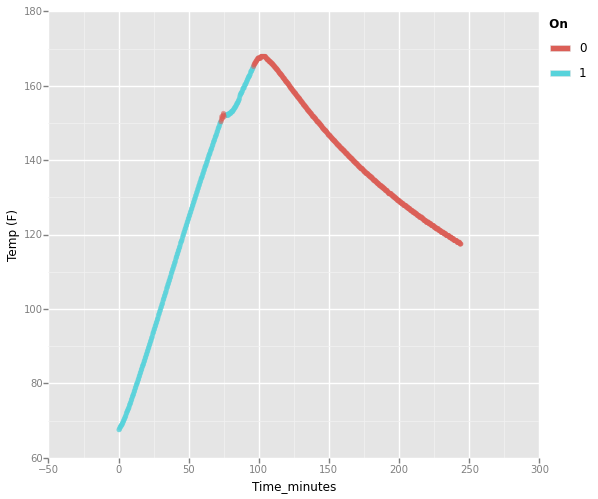

<ggplot: (24830927)>

In [30]:
ggplot(aes(x='Time_minutes', y = 'Temp (F)', color = 'On'), data = data)\
+ geom_point(alpha = .5)

>** Note how temperature still increased after we turned it off. This is similar to our electric stove where there is still residual heat transfer even after we turn it off. **

**Estimate the slope of the first "On" section:**

In [20]:
first_on = data[(data.On == 1) & (data.Time_minutes < 75)]
delta_time = first_on['Time (s)'].iloc[len(first_on)-1]
delta_temp = first_on['Temp_C'].iloc[len(first_on)-1] - first_on['Temp_C'].iloc[0]
slope = delta_temp / delta_time
print 'Slope = %f C/sec'%slope

Slope = 0.010543 C/sec


** Estimate power output: **

>**Specific heat of water = 4.18 jules per gram celcius. This means for each gram of water, it takes 4.18 jules to increase 1 gram of water by 1 degree celcius.**

In [27]:
specific_heat = 4.18
volume = 3 * 236   # cups * ml/cup * 1g/ml
power_output = specific_heat * volume * slope # jules/sec
print 'Effective power output on water = %.2f watts'%power_output

Effective power output on water = 31.20 watts


## What does the overshoot look like:

In [31]:
overshoot = data[(data.On == 0) & (data['Temp (F)'] >= 165.0)]
overshoot.set_index([range(len(overshoot))], inplace = True)
overshoot

,Time (s),Temp (F),On,Time_minutes,Temp_C
0,5776,165.20,0,96.266667,74.00
1,5791,165.65,0,96.516667,74.25
2,5806,165.65,0,96.766667,74.25
3,5822,166.10,0,97.033333,74.50
4,5837,166.10,0,97.283333,74.50
5,5852,166.10,0,97.533333,74.50
6,5867,166.55,0,97.783333,74.75
7,5882,166.55,0,98.033333,74.75
8,5898,166.55,0,98.300000,74.75
9,5913,167.00,0,98.550000,75.00


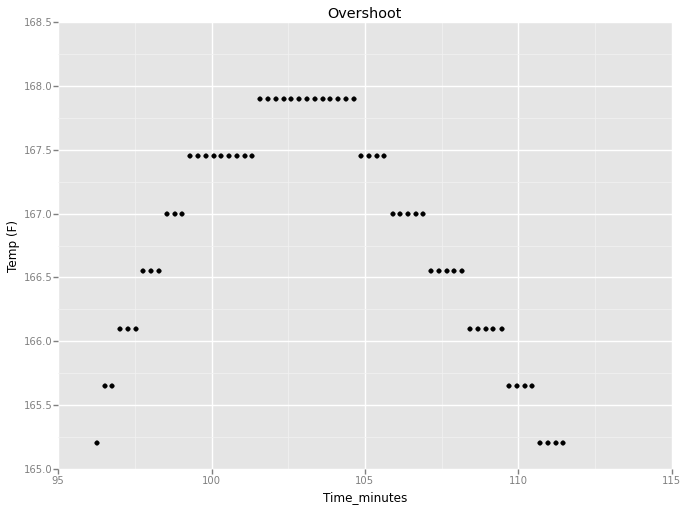

<ggplot: (28771907)>

In [33]:
ggplot(aes(x='Time_minutes', y = 'Temp (F)'), data = overshoot)\
+ geom_point()\
+ ggtitle('Overshoot')